<h1>Scaling relations between LIDAR and hyperspectral variables: an exploration of similarities in surface properties at the SJER site.</h1>

<em>JAMB cooperative (Jess, Annie, Maoya, Brandon)</em>

> **Objective: explore the relation between surface structural and reflective properties**

Indirect approach: 
- novel representations of  both LIDAR and hyperspectral variables over the entire site
    - spectral power functions (SPF)
    - cumulative distribution function (CDF)
- for each variable, compare these representations
    - for similarities in structure
    - for ecologically relevant characteristics
- Use this inspection to generate hypotheses

(NOTE:  a direct comparison of HS and LIDAR variables is possible, but not on a statistical basis)

In [55]:
# Import the scripts
from create_cdf import *
from canopy_biomass_model import *

In [49]:
# Create directory and file list for *.tif files in data dictionary
directory = 'DI_data/'
file_list = [i for i in os.listdir(directory) if i.endswith('.tif')]

# Array to hold sample used for selected index
var_array = np.zeros((len(file_list),500))

# Read in, sample for cdf function
for i in range(0,len(file_list)):
    filename = directory + file_list[i]
    print(filename)
    
    # Grab name for output .npy file
    out_name = file_list[i][0:-4]
    
    # Run function to get cdf arrays
    var_array[i,:] = sample_files(filename)

DI_data/ALBD.tif
DI_data/ARVI.tif
DI_data/Aspect.tif
DI_data/CHM.tif
DI_data/DSM.tif
DI_data/DTM.tif
DI_data/EVI.tif
DI_data/fPAR.tif
DI_data/LAI.tif
DI_data/MSI.tif
DI_data/NDII.tif
DI_data/NDLI.tif
DI_data/NDNI.tif
DI_data/NDVI.tif
DI_data/NDWI.tif
DI_data/NMDI.tif
DI_data/PRI.tif
DI_data/SAVI.tif
DI_data/Slope.tif
DI_data/WBI.tif


In [50]:
# Initialize cdf info array
cdf_info_array = np.zeros((2,500,var_array.shape[0]))

# Get CDF plotting vars for each variable
for i in range(0,len(file_list)):
    filename = directory + file_list[i]
    print(filename)
    temp = var_array[i,:]
    
    # Grab name for output .npy file
    out_name = file_list[i][0:-4]
    
    # out is a tuple of four arrays
    out = cdf(temp,out_name)
    
    # fill array with plotting variables from above
    cdf_info_array[0,:,i] = np.append(out[0],np.zeros((500-len(out[0]))))
    cdf_info_array[1,:,i] = np.append(out[1],np.zeros((500-len(out[1]))))
    
    # now fill zeros with NaNs
    cdf_info_array[np.where(cdf_info_array==0)] = np.nan

DI_data/ALBD.tif
DI_data/ARVI.tif
DI_data/Aspect.tif
DI_data/CHM.tif
DI_data/DSM.tif
DI_data/DTM.tif
DI_data/EVI.tif
DI_data/fPAR.tif
DI_data/LAI.tif
DI_data/MSI.tif
DI_data/NDII.tif
DI_data/NDLI.tif
DI_data/NDNI.tif
DI_data/NDVI.tif
DI_data/NDWI.tif
DI_data/NMDI.tif
DI_data/PRI.tif
DI_data/SAVI.tif
DI_data/Slope.tif
DI_data/WBI.tif


<h3>CDF and PS Plots illustrating Albedo</h3>

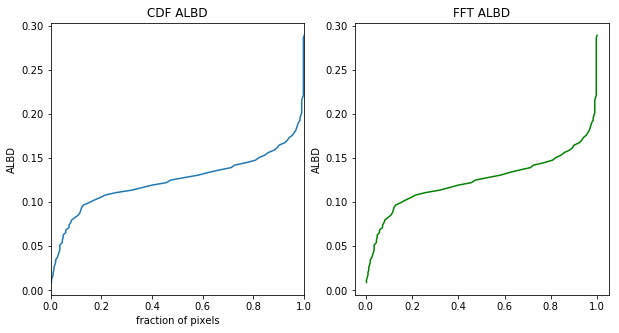

In [74]:
# Run function and plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ind = 0 # Index for Albedo
X1 = cdf_info_array[0,:,ind]
F1 = cdf_info_array[1,:,ind]
plt.title('CDF %s'%file_list[ind][0:-4])
ax.set_ylabel(file_list[ind][0:-4])
ax.set_xlabel('fraction of pixels')
ax.set_xlim([0,1])
ax.plot(F1,X1)

ax = fig.add_subplot(122)
ind = 0
X1 = cdf_info_array[0,:,ind] #replace with ps
F1 = cdf_info_array[1,:,ind]
plt.title('FFT %s'%file_list[ind][0:-4])
plt.ylabel(file_list[ind][0:-4])
ax.plot(F1,X1, color='green')
plt.show()
#sub.plt

<h3>CDF and PS Plots illustrating Canopy Height</h3>

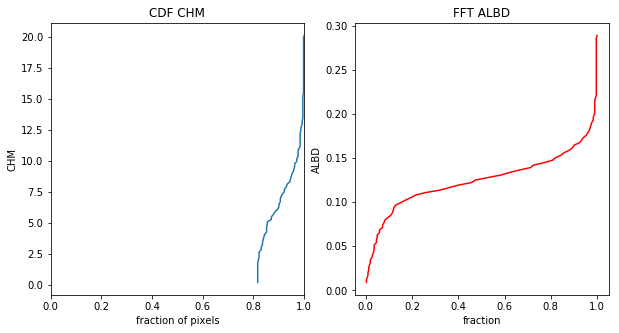

In [76]:
# Run function and plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ind = 3 # Index for Canopy Height
X1 = cdf_info_array[0,:,ind]
F1 = cdf_info_array[1,:,ind]
plt.title('CDF %s'%file_list[ind][0:-4])
ax.set_ylabel(file_list[ind][0:-4])
ax.set_xlabel('fraction of pixels')
ax.set_xlim([0,1])
ax.plot(F1,X1)

ax = fig.add_subplot(122)
ind = 0
X1 = cdf_info_array[0,:,ind] #replace with ps
F1 = cdf_info_array[1,:,ind]
plt.title('FFT %s'%file_list[ind][0:-4])
ax.set_ylabel(file_list[ind][0:-4])
ax.set_xlabel('fraction')
ax.plot(F1,X1, color='red')
plt.show()


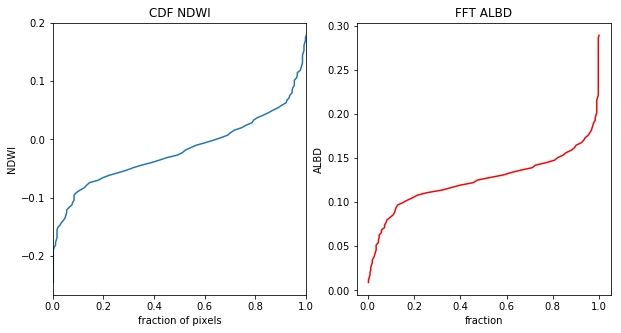

In [78]:
# Run function and plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ind = 14 # Index for NDVI
X1 = cdf_info_array[0,:,ind]
F1 = cdf_info_array[1,:,ind]
plt.title('CDF %s'%file_list[ind][0:-4])
ax.set_ylabel(file_list[ind][0:-4])
ax.set_xlabel('fraction of pixels')
ax.set_xlim([0,1])
ax.plot(F1,X1)

ax = fig.add_subplot(122)
ind = 0
X1 = cdf_info_array[0,:,ind] #replace with ps
F1 = cdf_info_array[1,:,ind]
plt.title('FFT %s'%file_list[ind][0:-4])
ax.set_ylabel(file_list[ind][0:-4])
ax.set_xlabel('fraction')
ax.plot(F1,X1, color='red')
plt.show()


**Issues to consider:**
- Influences of assumptions – for example, stationarity
- Use the same extent for both the LIDAR and HS images
- How much subsampling is needed?  Does it depend on the variable?
- Produce variance estimates by repeating the analyses over a subgrid